In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import numpy as np
import seaborn as sns; sns.set()
from datetime import datetime
import warnings

In [2]:
warnings.simplefilter('ignore')

In [3]:
# Gradient 1
g1_CTD = pd.read_csv('Grad1CTD.csv')

# Gradient 2
g2_CTD = pd.read_csv('Grad2CTD.csv')

# Gradient 3 
g3_CTD = pd.read_csv('Grad3CTD.csv')
g3temp_data = pd.read_csv('Grad3Temp.csv') #surface thermosaline data

In [4]:
# Flowcytometry datasets
g1_fcm = pd.read_feather('g1_fcm.feather')
g2_fcm = pd.read_feather('g2_fcm.feather')
g3_fcm = pd.read_csv('g3_fcm.csv')

In [27]:
# function to be used to make datetime of FCM data
def date_change(gradient_df, date_column):
    gradient_df['datetime'] = gradient_df[date_column].apply(lambda x: datetime.strptime(x, '%Y-%m-%dT%H:%M:%S'))
    return gradient_df

In [28]:
# function used to make datetime of CTD data
def date_change_CTD(CTD_df, time_column):
    CTD_df['datetime'] = CTD_df[time_column].apply(lambda x: datetime.strptime(x.split('.')[0], '%Y-%m-%dT%H:%M:%S'))
    return CTD_df

In [50]:
def date_change_meta_abun(meta_abun_df, date_column):
    meta_abun_df[date_column] = pd.to_datetime(meta_abun_df[date_column], format='%m/%d/%y %H:%M:%S')
    meta_abun_df['datetime'] = meta_abun_df[date_column].dt.strftime('%m-%d-%y %H:%M:%S')
    return meta_abun_df

In [32]:
# merging meta data and relative abundance data
meta = pd.read_csv('meta_data.csv')
rel_abun = pd.read_csv('rel_abun_data.csv')

meta_sub = meta[['SampleID', 'Cruise', 'Station', 'Datetime',
                       'Latitude', 'Longitude', 'Depth', 'Replicate']]
abun_sub = rel_abun[['SampleID', 'Genus', 'Clade', 'RelAbundance']]

# merging the meta and abun df --> subsetting for pro, replicate, and g3 depth profiles --> groupby on lat, clade, datetime, and mean relAbun --> add a rounded depth column
meta_abun = meta_sub.merge(abun_sub)
pro_meta_abun = meta_abun.loc[(meta_abun['Genus'] == 'Prochlorococcus') & (meta_abun['RelAbundance'] >= 0.05)]
g3_pro_meta_abun = pro_meta_abun.loc[(pro_meta_abun['Cruise'] == 'km1906') & (pro_meta_abun['Replicate'] == 'A')]
g3_depth_sample_id = 'G3.DEPTH'
g3_pro_meta_abun_depth = g3_pro_meta_abun[g3_pro_meta_abun['SampleID'].str[:8] == g3_depth_sample_id]
g3_pro_meta_abun_depth2 = g3_pro_meta_abun_depth.groupby(['Latitude', 'Clade', 'Datetime']).mean('RelAbundance').reset_index()
g3_pro_meta_abun_depth2['rdepth'] = g3_pro_meta_abun_depth2['Depth'].apply(lambda x: round(x/5) * 5)
g3_pro_meta_abun_depth2['rlat'] = g3_pro_meta_abun_depth2['Latitude'].round()

In [43]:
pd.unique(g3_pro_meta_abun_depth2['Datetime'])

array(['04/22/19 06:40:00', '04/22/19 06:44:00', '04/20/19 07:56:00',
       '04/20/19 08:00:00', '04/20/19 08:05:00', '04/16/19 08:03:00',
       '04/16/19 08:11:00', '04/24/19 14:39:00', '04/24/19 14:42:00',
       '04/24/19 14:47:00'], dtype=object)

In [51]:
g3_pro_meta_abun_depth2['datetime'] = date_change_meta_abun(g3_pro_meta_abun_depth2, 'Datetime')

ValueError: Columns must be same length as key

In [23]:
# g3_pro_meta_abun_depth

In [33]:
g3_pro_meta_abun_depth2.sort_values(by = 'Latitude')

,Latitude,Clade,Datetime,Station,Longitude,Depth,RelAbundance,rdepth,rlat
0,32.92,HLI,04/22/19 06:40:00,6.0,-158.00,75.0,0.906382,75,33.0
1,32.92,HLI,04/22/19 06:44:00,6.0,-158.00,15.0,0.959074,15,33.0
2,32.92,LLI,04/22/19 06:40:00,6.0,-158.00,75.0,0.055860,75,33.0
3,37.00,HLI,04/20/19 07:56:00,5.0,-158.00,125.0,0.137820,125,37.0
4,37.00,HLI,04/20/19 08:00:00,5.0,-158.00,55.0,0.336702,55,37.0
5,37.00,HLI,04/20/19 08:05:00,5.0,-158.00,15.0,0.452771,15,37.0
6,37.00,LLI,04/20/19 07:56:00,5.0,-158.00,125.0,0.207980,125,37.0
7,37.00,LLI,04/20/19 08:00:00,5.0,-158.00,55.0,0.309492,55,37.0
8,37.00,LLI,04/20/19 08:05:00,5.0,-158.00,15.0,0.132671,15,37.0
9,41.67,HLII,04/16/19 08:03:00,4.0,-158.05,50.0,0.100430,50,42.0


In [25]:
# g3_pro_meta_abun2['rdepth'] = g3_pro_meta_abun2['Depth'].apply(lambda x: round(x/5) * 5)
# g3_pro_meta_abun2['rlat'] = g3_pro_meta_abun2['Latitude'].round()
# g3_pro_meta_abun2['rlon'] = g3_pro_meta_abun2['Longitude'].round()

In [26]:
# subsetting all the FCM data
g1_sub_fcm = g1_fcm[['pop', 'norm.scatter', 'norm.red', 'norm.orange', 'date', 
                    'station', 'lat', 'lon', 'depth', 'replicate']]
g1_pro = g1_sub_fcm.loc[g1_sub_fcm['pop'] == 'prochloro']

g2_sub_fcm = g2_fcm[['pop', 'norm.scatter', 'norm.red', 'norm.orange', 'date', 
                    'station', 'lat', 'lon', 'depth', 'replicate']]
g2_pro = g2_sub_fcm.loc[g2_sub_fcm['pop'] == 'prochloro']

g3_sub_fcm = g3_fcm[['pop', 'norm.scatter', 'norm.red', 'norm.orange', 'date', 
                    'station', 'lat', 'lon', 'depth', 'replicate']]
g3_pro = g3_sub_fcm.loc[g3_sub_fcm['pop'] == 'prochloro']

# subsetting all the CTD data (only need temp for now)
g1_ctd = g1_CTD[['time', 'lat', 'lon', 'depth', 'ctdtmp']]
g2_ctd = g2_CTD[['time', 'lat', 'lon', 'depth', 'ctdtmp']]
g3_ctd = g3_CTD[['time', 'lat', 'lon', 'depth', 'Temperature']]

In [29]:
# changing all the dates into a new column called 'datetime' so that it will merge correctly to CTD data
g1_pro1 = date_change(g1_pro, 'date')
g2_pro1 = date_change(g2_pro, 'date')
g3_pro1 = date_change(g3_pro, 'date')

In [13]:
g1_pro1['depth'] = g1_pro1['depth'].astype(float)
g2_pro1['depth'] = g2_pro1['depth'].astype(float)
g3_pro1['depth'] = g3_pro1['depth'].astype(float)

In [14]:
# changing all the dates into a new column called 'datetime' so that it will merge correctly to FCM data
g1_CTD1 = date_change_CTD(g1_ctd, 'time')
g2_CTD1 = date_change_CTD(g2_ctd, 'time')
g3_CTD1 = date_change_CTD(g3_ctd, 'time')

In [15]:
g1_CTD1['rdepth'] = g1_CTD1['depth'].apply(lambda x: round(x/5) * 5)
g1_CTD1['rlat'] = g1_CTD1['lat'].round()

g1_pro1['rlat'] = g1_pro1['lat'].round()

In [16]:
g3_CTD1['rdepth'] = g3_CTD1['depth'].apply(lambda x: round(x/5) * 5)
g3_CTD1['rdepth'] = g3_CTD1['rdepth'].astype(float)
g3_CTD1['rlat'] = g3_CTD1['lat'].round()
g3_CTD1['rlon'] = g3_CTD1['lon'].round()

g3_pro1['rdepth'] = g3_pro1['depth'].apply(lambda x: round(x/5) * 5)
g3_pro1['rlat'] = g3_pro1['lat'].round()
g3_pro1['rlon'] = g3_pro1['lon'].round()
g3pro = g3_pro1.loc[g3_pro1['replicate'] == ' A']

In [40]:
g3_CTD_gb = g3_CTD1.groupby(['rlat', 'rdepth', 'datetime']).mean('Temperature').reset_index()

In [41]:
g3_CTD_gb

,rlat,rdepth,datetime,lat,lon,depth,Temperature,rlon
0,21.0,0.0,2019-04-10 03:21:12,21.348333,-158.276667,1.490710,25.266000,-158.0
1,21.0,5.0,2019-04-10 03:21:12,21.348333,-158.276667,4.968989,25.277800,-158.0
2,21.0,10.0,2019-04-10 03:21:12,21.348333,-158.276667,9.937863,25.215400,-158.0
3,21.0,15.0,2019-04-10 03:21:12,21.348333,-158.276667,14.906616,25.128400,-158.0
4,21.0,20.0,2019-04-10 03:21:12,21.348333,-158.276667,19.875248,25.112400,-158.0
...,...,...,...,...,...,...,...,...
3471,42.0,980.0,2019-04-25 01:32:40,42.333611,-158.000278,979.868953,3.178600,-158.0
3472,42.0,985.0,2019-04-16 09:20:23,41.682500,-158.043611,984.864887,3.291200,-158.0
3473,42.0,985.0,2019-04-25 01:32:40,42.333611,-158.000278,984.806042,3.171000,-158.0
3474,42.0,990.0,2019-04-16 09:20:23,41.682500,-158.043611,989.802154,3.280400,-158.0


In [42]:
g3_CTD_meta_abun = g3_CTD_gb.merge(g3_pro_meta_abun_depth2, left_on = ['datetime', 'rdepth', 'rlat'], right_on = ['Datetime', 'rdepth', 'rlat'])

ValueError: You are trying to merge on datetime64[ns] and object columns for key 'datetime'. If you wish to proceed you should use pd.concat

In [20]:
#sorting the datetimes of the dataframes
sorted_g3_CTD = g3_CTD1.sort_values('datetime')
sorted_g3_fcm = g3pro.sort_values('datetime')

sorted_g3_CTD['rdepth'] = sorted_g3_CTD['rdepth'].astype(float)

In [21]:
# merged dataframe of FCM and CTD data of Gradient 3
g3_fcm_ctd = pd.merge(sorted_g3_fcm, sorted_g3_CTD, on = ['rlat', 'rlon', 'rdepth'])
fin_g3_fcm_ctd = g3_fcm_ctd.dropna()


KeyboardInterrupt



In [74]:
print('FCM:', pd.unique(sorted_g3_fcm['datetime']))
print('CTD:', pd.unique(sorted_g3_CTD['datetime']))

FCM: ['2019-04-13T03:36:52.000000000' '2019-04-14T11:38:17.000000000'
 '2019-04-16T05:28:36.000000000' '2019-04-20T01:05:20.000000000'
 '2019-04-22T04:15:26.000000000' '2019-04-25T12:14:16.000000000'
 '2019-04-28T02:00:27.000000000']
CTD: ['2016-04-20T15:11:40.000000000' '2016-04-21T01:17:53.000000000'
 '2016-04-21T05:03:23.000000000' '2016-04-22T15:01:42.000000000'
 '2016-04-23T01:53:27.000000000' '2016-04-23T03:46:47.000000000'
 '2016-04-23T15:18:39.000000000' '2016-04-24T15:03:42.000000000'
 '2016-04-25T01:27:54.000000000' '2016-04-25T03:33:49.000000000'
 '2016-04-25T15:05:51.000000000' '2016-04-26T15:03:59.000000000'
 '2016-04-27T15:04:55.000000000' '2016-04-28T03:36:37.000000000'
 '2016-04-28T05:10:07.000000000' '2016-04-28T15:06:15.000000000'
 '2016-04-29T06:34:38.000000000' '2016-04-30T15:01:03.000000000'
 '2016-05-01T14:58:15.000000000' '2016-05-02T15:01:27.000000000'
 '2016-05-02T19:28:35.000000000' '2016-05-03T00:12:38.000000000']


In [73]:
g3_fcm_ctd

,pop,norm.scatter,norm.red,norm.orange,date,station,lat_x,lon_x,depth_x,replicate,datetime_x,rdepth,rlat,rlon,time,lat_y,lon_y,depth_y,ctdtmp,datetime_y
0,prochloro,0.067919,0.223650,0.000579,2019-04-14T11:38:17,3,36.910500,-157.999333,45.0,A,2019-04-14 11:38:17,45,37.0,-158.0,2016-04-26T15:03:59.000Z,37.301,-158.002,43.867297,11.202,2016-04-26 15:03:59
1,prochloro,0.067919,0.223650,0.000579,2019-04-14T11:38:17,3,36.910500,-157.999333,45.0,A,2019-04-14 11:38:17,45,37.0,-158.0,2016-04-27T15:04:55.000Z,36.570,-158.003,45.755748,11.633,2016-04-27 15:04:55
2,prochloro,0.067919,0.223650,0.000579,2019-04-14T11:38:17,3,36.910500,-157.999333,45.0,A,2019-04-14 11:38:17,45,37.0,-158.0,2016-04-28T03:36:37.000Z,36.567,-158.000,44.465608,11.643,2016-04-28 03:36:37
3,prochloro,0.067919,0.223650,0.000579,2019-04-14T11:38:17,3,36.910500,-157.999333,45.0,A,2019-04-14 11:38:17,45,37.0,-158.0,2016-04-28T03:36:37.000Z,36.567,-158.000,44.366365,11.643,2016-04-28 03:36:37
4,prochloro,0.067919,0.223650,0.000579,2019-04-14T11:38:17,3,36.910500,-157.999333,45.0,A,2019-04-14 11:38:17,45,37.0,-158.0,2016-04-28T03:36:37.000Z,36.567,-158.000,44.167879,11.644,2016-04-28 03:36:37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2485233,prochloro,0.039073,0.528052,0.000461,2019-04-22T04:15:26,6,32.933167,-158.000000,150.0,A,2019-04-22 04:15:26,150,33.0,-158.0,2016-04-25T01:27:54.000Z,32.700,-157.993,149.884331,14.644,2016-04-25 01:27:54
2485234,prochloro,0.039073,0.528052,0.000461,2019-04-22T04:15:26,6,32.933167,-158.000000,150.0,A,2019-04-22 04:15:26,150,33.0,-158.0,2016-04-25T03:33:49.000Z,32.676,-157.995,149.190056,14.327,2016-04-25 03:33:49
2485235,prochloro,0.009924,0.185625,0.000464,2019-04-22T04:15:26,6,32.933167,-158.000000,150.0,A,2019-04-22 04:15:26,150,33.0,-158.0,2016-04-24T15:03:42.000Z,32.584,-158.002,150.084240,14.231,2016-04-24 15:03:42
2485236,prochloro,0.009924,0.185625,0.000464,2019-04-22T04:15:26,6,32.933167,-158.000000,150.0,A,2019-04-22 04:15:26,150,33.0,-158.0,2016-04-25T01:27:54.000Z,32.700,-157.993,149.884331,14.644,2016-04-25 01:27:54


In [17]:
# merged dataframe of FCM and CTD data of Gradient 1
g1_fcm_ctd = pd.merge(g1_pro1, g1_CTD1, left_on = ['datetime', 'depth', 'rlat'], right_on = ['datetime', 'rdepth', 'rlat'], how='left')
fin_g1_fcm_ctd = g1_fcm_ctd.dropna()

In [41]:
g3_meta_abun_fcm_ctd = fin_g3_fcm_ctd.merge(g3_pro_meta_abun2, left_on = ['station', 'rdepth'], right_on = ['Station', 'rdepth'])

In [43]:
g3_meta_abun_fcm_ctd.columns

Index(['pop', 'norm.scatter', 'norm.red', 'norm.orange', 'date', 'station',
       'lat_x', 'lon_x', 'depth_x', 'replicate', 'datetime_x', 'rdepth',
       'rlat_x', 'rlon_x', 'time', 'lat_y', 'lon_y', 'depth_y', 'ctdtmp',
       'datetime_y', 'Latitude', 'Clade', 'Station', 'Longitude', 'Depth',
       'RelAbundance', 'rlat_y', 'rlon_y'],
      dtype='object')

In [42]:
g3_meta_abun_fcm_ctd

,pop,norm.scatter,norm.red,norm.orange,date,station,lat_x,lon_x,depth_x,replicate,...,ctdtmp,datetime_y,Latitude,Clade,Station,Longitude,Depth,RelAbundance,rlat_y,rlon_y
0,prochloro,0.013409,0.075937,0.000506,2019-04-20T01:05:20,5,36.999833,-157.999667,45.0,A,...,11.202,2016-04-26 15:03:59,37.000000,HLI,5.0,-158.000000,45.666667,0.360042,37.0,-158.0
1,prochloro,0.013409,0.075937,0.000506,2019-04-20T01:05:20,5,36.999833,-157.999667,45.0,A,...,11.202,2016-04-26 15:03:59,37.000000,LLI,5.0,-158.000000,45.666667,0.183576,37.0,-158.0
2,prochloro,0.013409,0.075937,0.000506,2019-04-20T01:05:20,5,36.999833,-157.999667,45.0,A,...,11.633,2016-04-27 15:04:55,37.000000,HLI,5.0,-158.000000,45.666667,0.360042,37.0,-158.0
3,prochloro,0.013409,0.075937,0.000506,2019-04-20T01:05:20,5,36.999833,-157.999667,45.0,A,...,11.633,2016-04-27 15:04:55,37.000000,LLI,5.0,-158.000000,45.666667,0.183576,37.0,-158.0
4,prochloro,0.013409,0.075937,0.000506,2019-04-20T01:05:20,5,36.999833,-157.999667,45.0,A,...,11.643,2016-04-28 03:36:37,37.000000,HLI,5.0,-158.000000,45.666667,0.360042,37.0,-158.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3193121,prochloro,0.003481,0.011512,0.000452,2019-04-22T04:15:26,6,32.933167,-158.000000,15.0,A,...,16.077,2016-04-30 15:01:03,39.763333,Not Assigned,6.0,-157.993833,15.000000,0.219522,40.0,-158.0
3193122,prochloro,0.003481,0.011512,0.000452,2019-04-22T04:15:26,6,32.933167,-158.000000,15.0,A,...,16.077,2016-04-30 15:01:03,32.583500,HLI,6.0,-158.001667,15.000000,0.809217,33.0,-158.0
3193123,prochloro,0.003481,0.011512,0.000452,2019-04-22T04:15:26,6,32.933167,-158.000000,15.0,A,...,16.077,2016-04-30 15:01:03,39.763333,Not Assigned,6.0,-157.993833,15.000000,0.219522,40.0,-158.0
3193124,prochloro,0.003481,0.011512,0.000452,2019-04-22T04:15:26,6,32.933167,-158.000000,15.0,A,...,16.077,2016-04-30 15:01:03,32.583500,HLI,6.0,-158.001667,15.000000,0.809217,33.0,-158.0


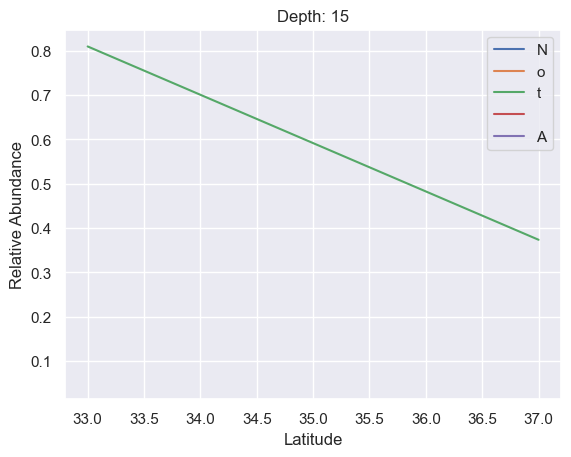

In [69]:
g3_mafc_depths = pd.unique(g3_meta_abun_fcm_ctd['rdepth'])

for depth in g3_mafc_depths:
    depth_df = g3_meta_abun_fcm_ctd.loc[g3_meta_abun_fcm_ctd['rdepth'] == depth]
    clades = pd.unique(depth_df['Clade'])
    for clade in clades:
        clade_df = depth_df.loc[depth_df['Clade'] == clade]
        lat = clade_df['rlat_x']
        rel_abun = clade_df['RelAbundance']
        
        plt.title('Depth: ' + str(depth))
        plt.xlabel('Latitude')
        plt.ylabel('Relative Abundance')
        plt.plot(lat, rel_abun)
        plt.legend(clade)
    

In [70]:
pd.unique(g3_meta_abun_fcm_ctd['Clade'])

array(['HLI', 'LLI', 'Not Assigned'], dtype=object)

In [ ]:
g3_final_depths = [15, 45]
g3_final_clade = ['HLI', 'LLI']

for depth in g3_final_depths:
    g3_df = g3_meta_abun_fcm_ctd.loc[g3_meta_abun_fcm_ctd['rdepth'] == depth]
    clades = pd.unique(g3_df['Clade'])
    for clade in clades:
        clade_df = g3_df